In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [ ]:
print("Количество пропусков в данных:", X.isnull().values.sum())
print(X.dtypes)


Количество пропусков в данных: 0
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


Категориальных признаков в данных нет.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, stratify=y, random_state = np.random.seed(0))



Параметр stratify отвечает за то, что новые данные train и test имеют такие же пропорции в данных как и входной датасет. Это делается для того, чтобы не было дисбаланса классов.

In [ ]:
normalizer = StandardScaler()
normalizer.fit(X_train)
classifiers = [1, 3, 5, 10, 15, 25]
X_train_transformed = pd.DataFrame(normalizer.transform(X_train), columns = data['feature_names'])
X_test_transformed = pd.DataFrame(normalizer.transform(X_test), columns = data['feature_names'])
X_train_clf = X_train_transformed[['alcohol', 'magnesium']]
X_test_clf = X_test_transformed[['alcohol', 'magnesium']]



clf_list = []
for i in classifiers:
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train_clf, y_train)
  y_test_predicted = (
        KNeighborsClassifier(n_neighbors=i).fit(X_train_clf, y_train).predict(X_test_clf))
  y_train_predicted = (
        KNeighborsClassifier(n_neighbors=i).fit(X_train_clf, y_train).predict(X_train_clf))

  clf_list.append(clf)
  test_accuracy = np.mean(y_test_predicted == y_test)
  train_accuracy = np.mean(y_train_predicted == y_train)

  print(f"k = {i}; train_accuracy = {train_accuracy:.3f}; test_accuracy = {test_accuracy:.2f}")


k = 1; train_accuracy = 0.992; test_accuracy = 0.72
k = 3; train_accuracy = 0.798; test_accuracy = 0.74
k = 5; train_accuracy = 0.774; test_accuracy = 0.76
k = 10; train_accuracy = 0.782; test_accuracy = 0.78
k = 15; train_accuracy = 0.726; test_accuracy = 0.72
k = 25; train_accuracy = 0.718; test_accuracy = 0.74


In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

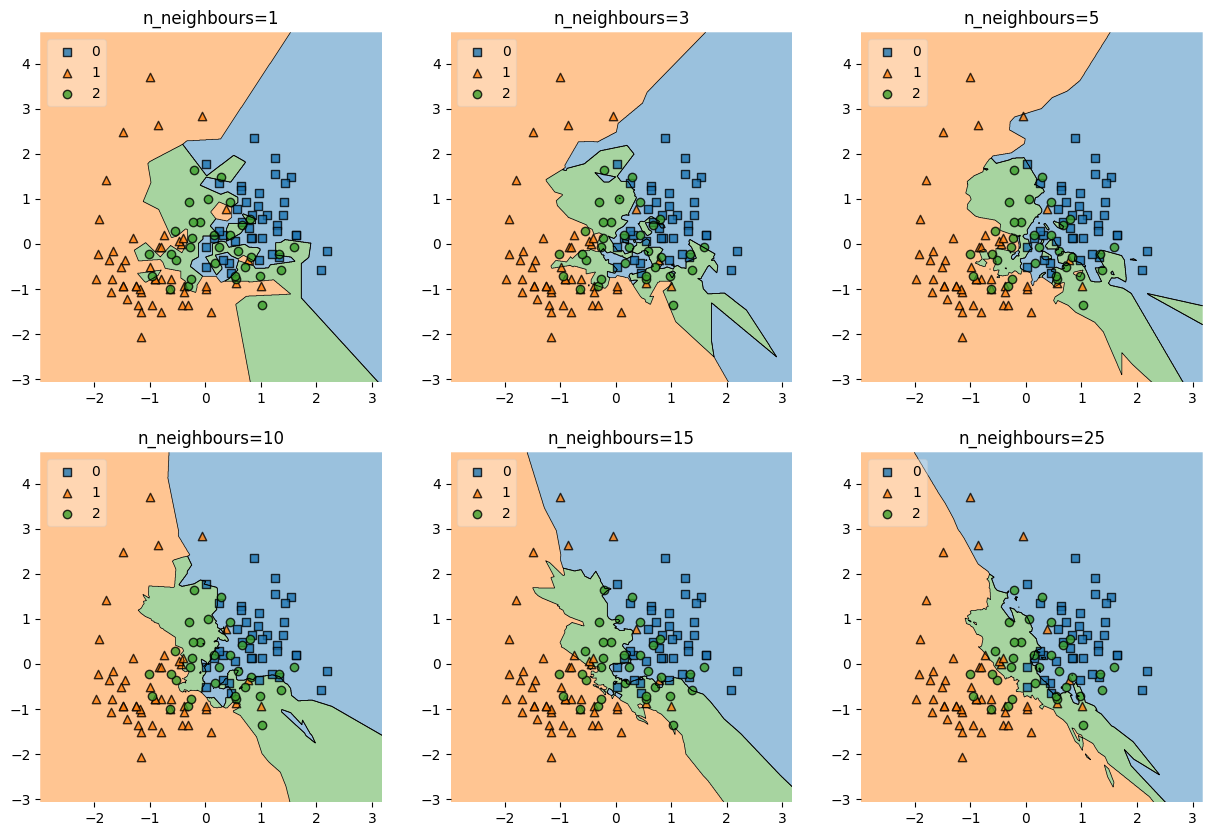

In [ ]:
X_train_clf_numpy = X_train_clf.to_numpy()
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(15,10))
labels = ['n_neighbours=1', 'n_neighbours=3','n_neighbours=5', 'n_neighbours=10', 'n_neighbours=15','n_neighbours=25']
for clf, lab, grd in zip(clf_list,
                         labels,
                         itertools.product(range(2), range(3))):

    clf.fit(X_train_clf, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_clf_numpy, y=y_train, clf=clf, legend=2)
    plt.title(lab)

При n = 1,3, оранжевая часть как бы захватывает синюю, зеленая поверхность очень кусочна, много островков и разрывов, есть места где находится всего один элемент. При n = 5, 10, 15 ситуация лучше, но также есть недостатки. Я бы выбрал количество соседей равное 25.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = self.count_distances(x)
            indixes = np.argsort(distances)[range(self.k)]
            nearest = self.y_train[indixes]
            most_common = Counter(nearest).most_common(1)
            y_pred.append(most_common[0][0])
        return np.array(y_pred)

    def count_distances(self, x):
        return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))


In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
test_knn(KNN)

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print("Количество пропусков в данных:", data.isnull().values.sum())
data = data.drop(['Unnamed: 0'], axis = 1)

Количество пропусков в данных: 0


In [ ]:
y = data['price']
X = data.drop(['price'], axis = 1)

display(y)
display(X)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [ ]:
data[['carat','depth','table','x','y','z','price']].corr().drop(['x','y','z', 'carat', 'depth', 'table'], axis = 1)

,price
carat,0.921591
depth,-0.010647
table,0.127134
x,0.884435
y,0.865421
z,0.861249
price,1.000000


Больше всего на цену (целевую переменную) влияет каратность (carat) и размер бриллианта (x,y,z)

In [ ]:
X_dum = pd.get_dummies(X, drop_first=True)
X_dum

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y,  test_size = 0.3, random_state = np.random.seed(0))
display(X_train)
display(y_train)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16259,1.01,62.0,57.0,6.44,6.36,3.97,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24005,1.54,62.6,56.0,7.42,7.35,4.62,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12211,1.15,63.1,63.0,6.63,6.53,4.15,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
37918,0.41,60.6,57.0,4.79,4.84,2.92,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,0.54,61.5,57.0,5.24,5.26,3.23,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.52,60.7,59.0,5.18,5.14,3.13,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
52416,0.70,63.6,60.0,5.59,5.51,3.51,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42613,0.32,61.3,58.0,4.35,4.39,2.68,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
43567,0.41,61.0,57.0,4.81,4.79,2.93,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


16259     6504
24005    12171
12211     5193
37918     1007
181       2776
         ...  
45891     1720
52416     2512
42613      505
43567     1431
2732      3246
Name: price, Length: 37758, dtype: int64

In [ ]:

normalizer = StandardScaler()

normalizer.fit(X_train)
columns = X_train.columns
columns = np.array(columns)
X_train_transformed = pd.DataFrame(normalizer.transform(X_train), columns= columns)
X_test_transformed = pd.DataFrame(normalizer.transform(X_test), columns = columns)

X_train_transformed
columns



array(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

LinReg.fit(X_train_transformed, y_train)

y_test_pred = LinReg.predict(X_test_transformed)
y_train_pred = LinReg.predict(X_train_transformed)


def MSE(y: np.array, y_pred: np.array) -> np.float64:
    return ((y - y_pred) ** 2).mean()

mse_train = MSE(y=y_train, y_pred=y_train_pred)
mse_test = MSE(y=y_test, y_pred=y_test_pred)
print(f"Mean Square Error on test is: {mse_test}")
print(f"Mean Square Error on train is: {mse_train}")



Mean Square Error on test is: 1259159.1137946642
Mean Square Error on train is: 1284661.862119126


In [ ]:
Coefs = pd.DataFrame(LinReg.coef_).transpose()
Coefs.columns = columns
Coefs

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,5278.119984,-94.266936,-65.618372,-1050.02476,-2.64738,-40.568623,155.923708,389.952109,314.449843,291.047679,...,-339.522613,-430.763476,-517.728075,957.549314,1573.204421,1016.237239,1640.463647,1790.842805,1263.34765,1445.482918


'carat', 'x' - эти два признака имеют самые большие коэффиценты по модулю


In [ ]:
from sklearn import linear_model
LinLasso = linear_model.Lasso(alpha = 10)

LinLasso.fit(X_train_transformed, y_train)
Lasso_coefs = pd.DataFrame(LinLasso.coef_).transpose()
Lasso_coefs.columns = columns
Lasso_coefs

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,4784.582238,-100.464174,-76.807094,-603.524914,-0.0,-40.091536,32.159141,184.435931,128.387794,120.813192,...,-267.919597,-359.196594,-459.604735,655.306335,869.817786,406.580298,1046.999773,1103.880449,846.46601,963.061608


In [ ]:
LinRidge = linear_model.Ridge(alpha = 10)

LinRidge.fit(X_train_transformed, y_train)
Ridge_coefs = pd.DataFrame(LinRidge.coef_).transpose()
Ridge_coefs.columns = columns
Ridge_coefs

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,5240.032594,-92.462101,-65.791097,-1008.689745,-4.490211,-44.057134,156.659289,391.313955,315.64141,292.535205,...,-338.702374,-429.4431,-516.473294,945.726951,1544.182397,991.59227,1616.355067,1762.713753,1246.795133,1426.057086


В Lasso регрессии веса уменьшились достаточно сильно, некоторые из них занулились (именно это свойство помогает отбирать нужные веса), а вот Ridge регрессия не сильно повлияла на веса.

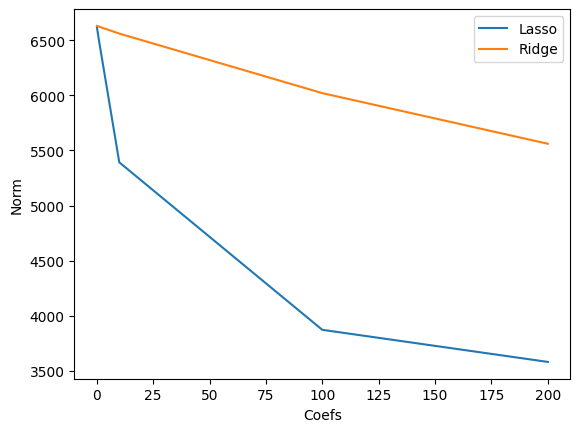

In [ ]:
alphas = np.array([0.1, 1, 10, 100, 200])
lasso_coefs = []
ridge_coefs = []
for alpha in alphas:
  LinLasso = linear_model.Lasso(alpha = alpha)
  LinLasso.fit(X_train_transformed, y_train)
  lasso_coefs.append(np.linalg.norm(LinLasso.coef_))

  LinRidge = linear_model.Ridge(alpha = alpha)
  LinRidge.fit(X_train_transformed, y_train)
  ridge_coefs.append(np.linalg.norm(LinRidge.coef_))


plt.figure()
plt.plot(alphas, lasso_coefs, label='Lasso')
plt.plot(alphas, ridge_coefs, label='Ridge')
plt.xlabel('Coefs')
plt.ylabel('Norm')
plt.legend()
plt.show()


Lasso регрессия гораздо агрессивнее уменьшает веса, также она имеет тенденцию занулять некоторые веса. Именно это свойство используют для отбора наиболее важных признаков.

In [ ]:
LinLassoCV = linear_model.LassoCV(alphas=alphas, cv = 5)
LinLassoCV.fit(X_train_transformed, y_train)
MSE_err = LinLassoCV.mse_path_
MSE_err_mean = np.mean(MSE_err, axis = 1)
alpha_index = np.argmin(MSE_err_mean)
best_alpha = LinLassoCV.alphas_[alpha_index]

display(MSE_err_mean)
print("Предпочтительная альфа: ", best_alpha)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1139598866.5661163, tolerance: 48309472.87280814
  model = cd_fast.enet_coordinate_descent_gram(


array([2167431.57301813, 1792168.41933385, 1346195.9333768 ,
       1288260.08692634, 1293159.32304376])

Предпочтительная альфа:  1.0


In [ ]:

LinLasso_end = linear_model.Lasso(alpha = best_alpha)

LinLasso_end.fit(X_test_transformed, y_test)
Lasso_end_coefs = pd.DataFrame(LinLasso_end.coef_).transpose()
Lasso_end_coefs.columns = columns
Lasso_end_coefs

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.389e+07, tolerance: 2.577e+07
  model = cd_fast.enet_coordinate_descent(


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,5449.536942,-87.823646,-44.651903,-1559.133662,304.431432,-0.0,178.699342,427.203725,355.700323,308.871713,...,-376.239668,-460.862596,-532.052404,928.29819,1481.895201,944.321834,1553.314448,1701.416025,1201.522566,1383.650142


Очевидно, наиболее важным признаком оказалась каратность камня. Чем больше каратность, тем больше стоит камень, этот признак влияет больше всего. Также длина камня достаточный параметр, чем меньше, тем лучше. Параметр 'z' занулился, то есть высота камня особо сильно не влияет на его цену.

In [ ]:
y_pred = LinLasso_end.predict(X_test_transformed)

mse_test = MSE(y=y_test, y_pred=y_pred)
print(f"Mean Square Error on test is: {mse_test}")

Mean Square Error on test is: 1253236.1733512867


В задании 3.7 ошибка составила 1259159.1137946642, здесь ошибка составляет 1253236.1733512867. Она конечно уменьшилась, но не сильно. Как будто такое уменьшение может быть определено погрешностью. Но в целом лучше использовать вторую модель.